In [68]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
plt.rcParams['font.sans-serif'] = ['SimHei']


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 说明---三个有效秩

为了更好的反应不同的scale对应的有效秩的大小和变化情况,希望可以在每一个scale下多做几次计算,这样的话,可以通过取平均等方法消除不确定的噪音

In [69]:
# 首先加载自己的支持函数
from support_code.get_rank_cpu_0904 import get_Effective_Ranks, Effective_Ranks
from support_code.load_dataset import get_data_loader
from support_code.MLP import MLP
from support_code.scale_ranks import get_rank
# 然后加载其他可能需要的库
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import torchvision
from torchvision.datasets import CIFAR10
import numpy as np
import os
# 指定存储图像的目录
output_dir = 'Ranks-0-360/csv'
csv_folder = r'Ranks-0-360\\csv'
img_dir = 'Ranks-0-360/img'

# 如果目录不存在，创建它
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [70]:
import pandas as pd

# 设置设备
device_cuda = torch.device("cuda" if torch.cuda.is_available() else "cpu")
min_angle_list = range(0,360,10)
i = 1

for min_angle in tqdm(min_angle_list):
    max_angle = min_angle + 10

    train_loader, test_loader = get_data_loader(min_angle=0, max_angle=max_angle)

    # 构建动态字符串
    index_rk = "rk_max_index"
    value_rk = "rk_max_value"
    value_Rk_index_max_rk = "value_Rk_index_max_rk" # 这里记录的是rk最大的时候的k对应的Rk的value
    r_0 = "r0"
    # 建立字典，保存结果
    rank_dict = {
        index_rk: [],
        value_rk: [],
        value_Rk_index_max_rk: [],
        r_0: []
    }

    for m in range(5):
        num1, num2, num3, num4 = get_rank(train_loader=train_loader) # 将值按顺序添加到对应的列表中
        rank_dict[index_rk].append(num1)
        rank_dict[value_rk].append(num2)
        rank_dict[value_Rk_index_max_rk].append(num3)
        rank_dict[r_0].append(num4)

    df = pd.DataFrame(rank_dict)
    filename = "{}-{:.4f}, {:.4f}.csv".format(i, 0, max_angle)
    df.to_csv(output_dir + '/' + filename, index=False)
    # print("success!")
    i += 1



  0%|          | 0/36 [00:00<?, ?it/s]

Files already downloaded and verified
Files already downloaded and verified


  3%|▎         | 1/36 [01:09<40:32, 69.49s/it]

Files already downloaded and verified
Files already downloaded and verified


  6%|▌         | 2/36 [02:18<39:17, 69.35s/it]

Files already downloaded and verified
Files already downloaded and verified


  8%|▊         | 3/36 [03:27<38:06, 69.28s/it]

Files already downloaded and verified
Files already downloaded and verified


 11%|█         | 4/36 [04:38<37:08, 69.65s/it]

Files already downloaded and verified
Files already downloaded and verified


 14%|█▍        | 5/36 [05:47<36:00, 69.70s/it]

Files already downloaded and verified
Files already downloaded and verified


 17%|█▋        | 6/36 [06:57<34:48, 69.63s/it]

Files already downloaded and verified
Files already downloaded and verified


 19%|█▉        | 7/36 [08:07<33:43, 69.79s/it]

Files already downloaded and verified
Files already downloaded and verified


 22%|██▏       | 8/36 [09:17<32:32, 69.72s/it]

Files already downloaded and verified
Files already downloaded and verified


 25%|██▌       | 9/36 [10:26<31:16, 69.51s/it]

Files already downloaded and verified
Files already downloaded and verified


 28%|██▊       | 10/36 [11:30<29:25, 67.92s/it]

Files already downloaded and verified
Files already downloaded and verified


 31%|███       | 11/36 [12:36<28:02, 67.28s/it]

Files already downloaded and verified
Files already downloaded and verified


 33%|███▎      | 12/36 [13:42<26:43, 66.80s/it]

Files already downloaded and verified
Files already downloaded and verified


 36%|███▌      | 13/36 [14:48<25:33, 66.68s/it]

Files already downloaded and verified
Files already downloaded and verified


 39%|███▉      | 14/36 [15:54<24:25, 66.63s/it]

Files already downloaded and verified
Files already downloaded and verified


 42%|████▏     | 15/36 [17:01<23:19, 66.63s/it]

Files already downloaded and verified
Files already downloaded and verified


 44%|████▍     | 16/36 [18:07<22:07, 66.37s/it]

Files already downloaded and verified
Files already downloaded and verified


 47%|████▋     | 17/36 [19:13<20:57, 66.20s/it]

Files already downloaded and verified
Files already downloaded and verified


 50%|█████     | 18/36 [20:19<19:52, 66.26s/it]

Files already downloaded and verified
Files already downloaded and verified


 53%|█████▎    | 19/36 [21:25<18:47, 66.30s/it]

Files already downloaded and verified
Files already downloaded and verified


 56%|█████▌    | 20/36 [22:32<17:40, 66.31s/it]

Files already downloaded and verified
Files already downloaded and verified


 58%|█████▊    | 21/36 [23:38<16:34, 66.30s/it]

Files already downloaded and verified
Files already downloaded and verified


 61%|██████    | 22/36 [24:45<15:29, 66.41s/it]

Files already downloaded and verified
Files already downloaded and verified


 64%|██████▍   | 23/36 [25:51<14:22, 66.34s/it]

Files already downloaded and verified
Files already downloaded and verified


 67%|██████▋   | 24/36 [27:02<13:34, 67.85s/it]

Files already downloaded and verified
Files already downloaded and verified


 69%|██████▉   | 25/36 [28:16<12:46, 69.66s/it]

Files already downloaded and verified
Files already downloaded and verified


 72%|███████▏  | 26/36 [29:26<11:38, 69.83s/it]

Files already downloaded and verified
Files already downloaded and verified


 75%|███████▌  | 27/36 [30:38<10:33, 70.42s/it]

Files already downloaded and verified
Files already downloaded and verified


 78%|███████▊  | 28/36 [31:47<09:19, 70.00s/it]

Files already downloaded and verified
Files already downloaded and verified


 81%|████████  | 29/36 [32:57<08:09, 69.92s/it]

Files already downloaded and verified
Files already downloaded and verified


 83%|████████▎ | 30/36 [34:07<06:59, 69.84s/it]

Files already downloaded and verified
Files already downloaded and verified


 86%|████████▌ | 31/36 [35:16<05:48, 69.70s/it]

Files already downloaded and verified
Files already downloaded and verified


 89%|████████▉ | 32/36 [36:26<04:38, 69.64s/it]

Files already downloaded and verified
Files already downloaded and verified


 92%|█████████▏| 33/36 [37:37<03:30, 70.29s/it]

Files already downloaded and verified
Files already downloaded and verified


 94%|█████████▍| 34/36 [38:47<02:19, 69.98s/it]

Files already downloaded and verified
Files already downloaded and verified


 97%|█████████▋| 35/36 [39:56<01:09, 69.90s/it]

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 36/36 [41:06<00:00, 68.52s/it]


# 新时代下处理ranks的新方法

In [71]:
from support_code.draw_rank import *

result_data = calculate_mean_and_variance(csv_folder)


1-0.0000, 10.0000.csv
2-0.0000, 20.0000.csv
3-0.0000, 30.0000.csv
4-0.0000, 40.0000.csv
5-0.0000, 50.0000.csv
6-0.0000, 60.0000.csv
7-0.0000, 70.0000.csv
8-0.0000, 80.0000.csv
9-0.0000, 90.0000.csv
10-0.0000, 100.0000.csv
11-0.0000, 110.0000.csv
12-0.0000, 120.0000.csv
13-0.0000, 130.0000.csv
14-0.0000, 140.0000.csv
15-0.0000, 150.0000.csv
16-0.0000, 160.0000.csv
17-0.0000, 170.0000.csv
18-0.0000, 180.0000.csv
19-0.0000, 190.0000.csv
20-0.0000, 200.0000.csv
21-0.0000, 210.0000.csv
22-0.0000, 220.0000.csv
23-0.0000, 230.0000.csv
24-0.0000, 240.0000.csv
25-0.0000, 250.0000.csv
26-0.0000, 260.0000.csv
27-0.0000, 270.0000.csv
28-0.0000, 280.0000.csv
29-0.0000, 290.0000.csv
30-0.0000, 300.0000.csv
31-0.0000, 310.0000.csv
32-0.0000, 320.0000.csv
33-0.0000, 330.0000.csv
34-0.0000, 340.0000.csv
35-0.0000, 350.0000.csv
36-0.0000, 360.0000.csv


0it [00:00, ?it/s]

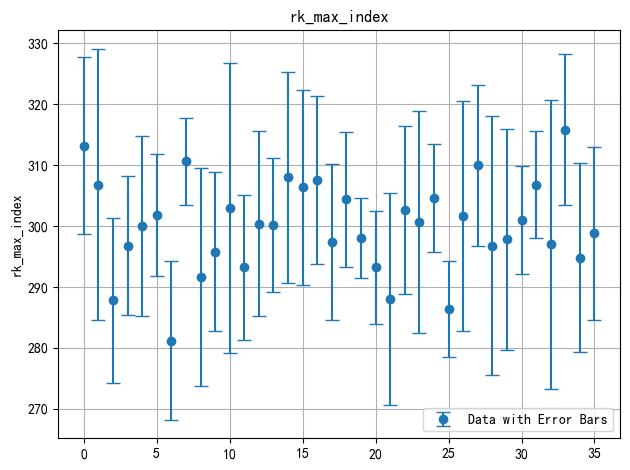

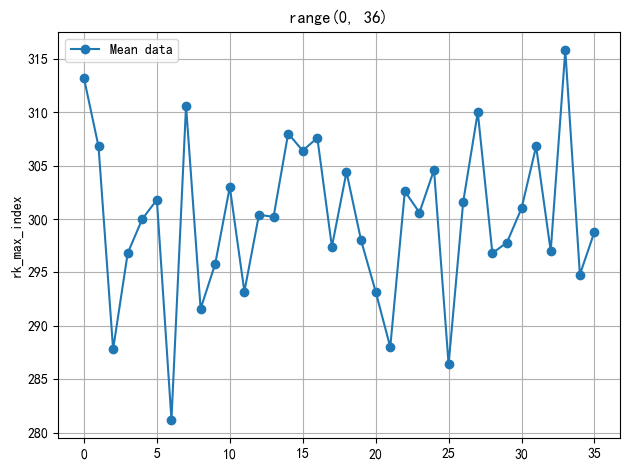

1it [00:00,  2.14it/s]

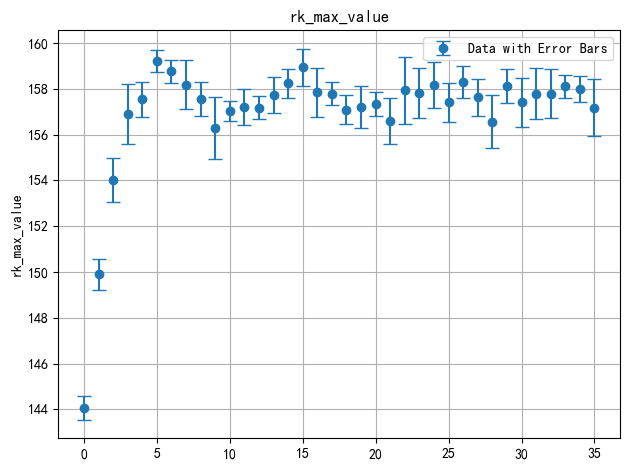

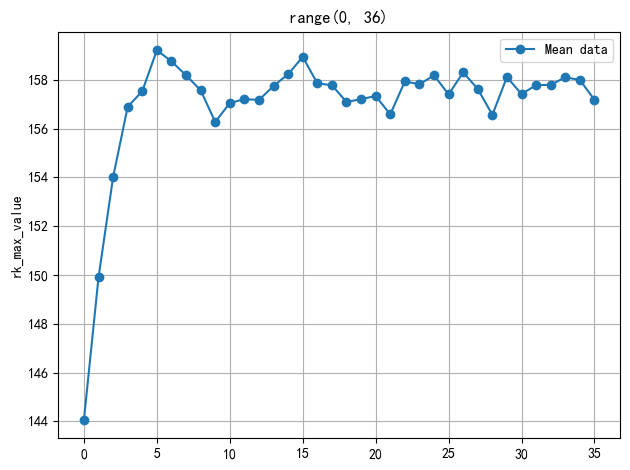

2it [00:00,  2.19it/s]

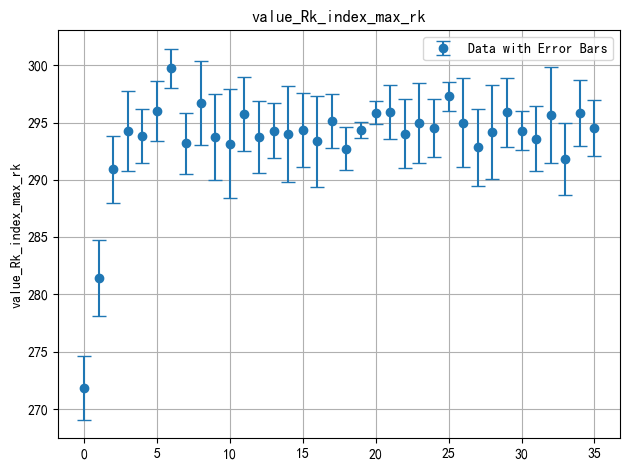

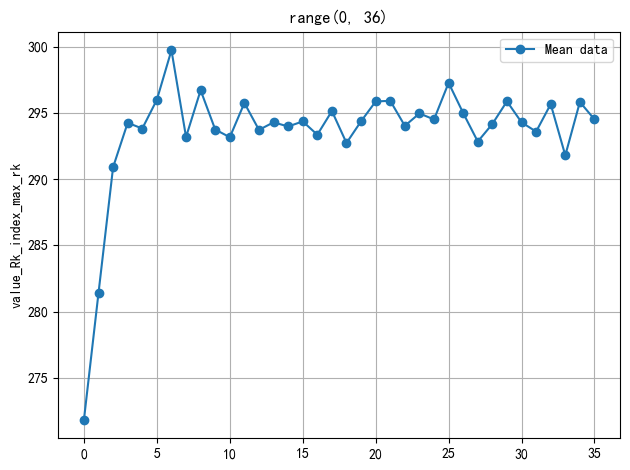

3it [00:01,  2.16it/s]

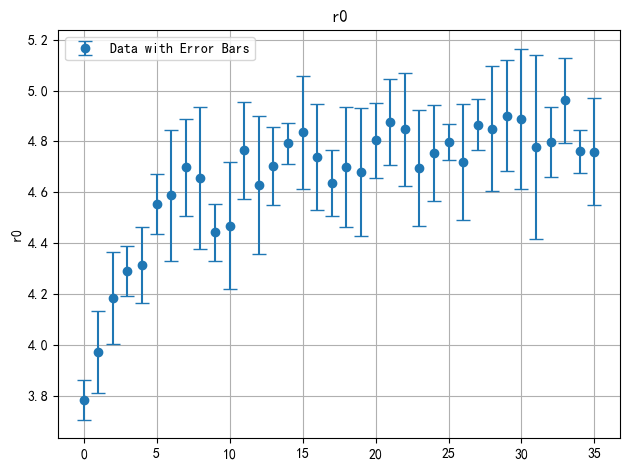

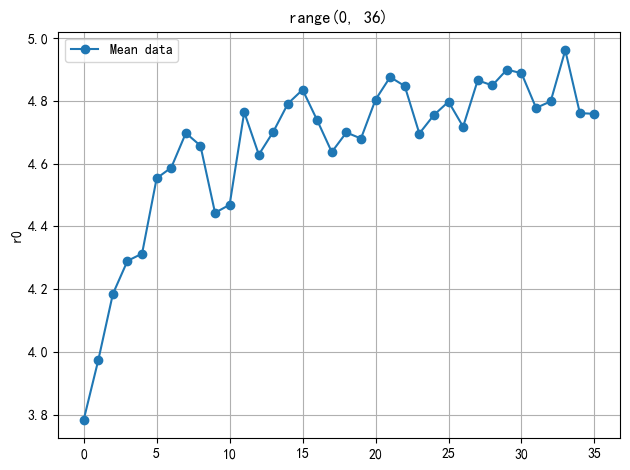

4it [00:01,  2.18it/s]


In [73]:
columns_to_plot = ["rk_max_index", "rk_max_value", "value_Rk_index_max_rk", "r0"]
for i, ranks in tqdm(enumerate(result_data)):

    scatter_plot_with_error_bars(data=ranks, y_label=columns_to_plot[i], title=f'{columns_to_plot[i]}',img_folder = f'{img_dir}\\bar')
    scatter_plot_mean(x_data=range(len(ranks)), data=ranks, y_label=columns_to_plot[i],img_folder = f'{img_dir}\mean', plot=True)